In [15]:
%% Machine Learning Online Class - Exercise 2: Logistic Regression
%
%  Instructions
%  ------------
% 
%  This file contains code that helps you get started on the logistic
%  regression exercise. You will need to complete the following functions 
%  in this exericse:
%
%     sigmoid.m
%     costFunction.m
%     predict.m
%     costFunctionReg.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% Load Data
%  The first two columns contains the exam scores and the third column
%  contains the label.

data = load('ex2data1.txt');
X = data(:, [1, 2]); y = data(:, 3);


Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


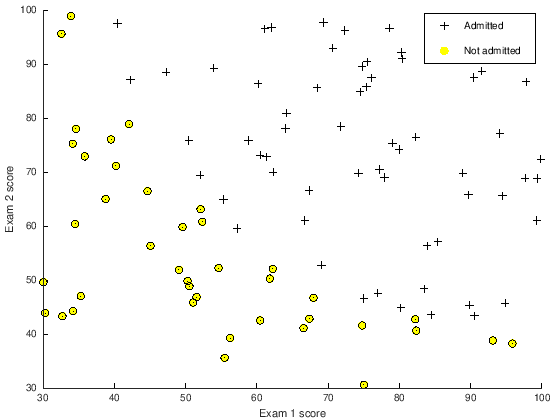

In [16]:
%% ==================== Part 1: Plotting ====================
%  We start the exercise by first plotting the data to understand the 
%  the problem we are working with.

fprintf(['Plotting data with + indicating (y = 1) examples and o ' ...
         'indicating (y = 0) examples.\n']);

plotData(X, y);

% Put some labels 
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;


In [24]:
%% ============ Part 2: Compute Cost and Gradient ============
%  In this part of the exercise, you will implement the cost and gradient
%  for logistic regression. You neeed to complete the code in
%  costFunction.m

%  Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = size(X);

% Add intercept term to x and X_test
Xm = [ones(m, 1) X];


% Initialize fitting parameters
initial_theta = zeros(n + 1, 1);

% Compute and display initial cost and gradient
[cost, grad] = costFunction(initial_theta, Xm, y);

fprintf('Cost at initial theta (zeros): %f\n', cost);
fprintf('Expected cost (approx): 0.693\n');
fprintf('Gradient at initial theta (zeros): \n');
fprintf(' %f \n', grad);
fprintf('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n');

% Compute and display cost and gradient with non-zero theta
test_theta = [-24; 0.2; 0.2];
[cost, grad] = costFunction(test_theta, Xm, y);

fprintf('\nCost at test theta: %f\n', cost);
fprintf('Expected cost (approx): 0.218\n');
fprintf('Gradient at test theta: \n');
fprintf(' %f \n', grad);
fprintf('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n');

J =  0.69315
grad =

   -0.10000  -12.00922  -11.26284

Cost at initial theta (zeros): 0.693147
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
 -0.100000 
 -12.009217 
 -11.262842 
Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628
J =  0.21833
grad =

   0.042903   2.566234   2.646797


Cost at test theta: 0.218330
Expected cost (approx): 0.218
Gradient at test theta: 
 0.042903 
 2.566234 
 2.646797 
Expected gradients (approx):
 0.043
 2.566
 2.647


Cost at theta found by fminunc: 0.203498
Expected cost (approx): 0.203
theta: 
 -25.161272 
 0.206233 
 0.201470 
Expected theta (approx):
 -25.161
 0.206
 0.201


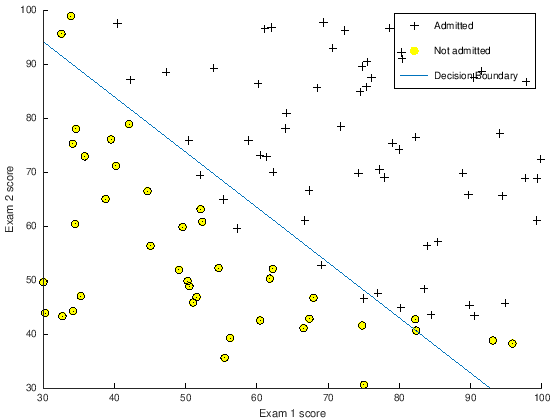

In [28]:
%% ============= Part 3: Optimizing using fminunc  =============
%  In this exercise, you will use a built-in function (fminunc) to find the
%  optimal parameters theta.

%  Set options for fminunc
options = optimset('GradObj', 'on', 'MaxIter', 400);

%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost
[theta, cost] = ...
	fminunc(@(t)(costFunction(t, Xm, y)), initial_theta, options);

% Print theta to screen
fprintf('Cost at theta found by fminunc: %f\n', cost);
fprintf('Expected cost (approx): 0.203\n');
fprintf('theta: \n');
fprintf(' %f \n', theta);
fprintf('Expected theta (approx):\n');
fprintf(' -25.161\n 0.206\n 0.201\n');

% Plot Boundary
plotDecisionBoundary(theta, Xm, y);

% Put some labels
hold on;
% Labels and Legend
xlabel('Exam 1 score')
ylabel('Exam 2 score')

% Specified in plot order
legend('Admitted', 'Not admitted')
hold off;